## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [3]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [7]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [9]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [11]:
train.info(), test.info() #пропусков нет, в каждом столбце кол-во ненулевых значений совпадает с размером датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tBodyAccMag-mean()            7352 non-null   float64
 1   tBodyGyroJerk-mad()-X         7352 non-null   float64
 2   tGravityAcc-min()-X           7352 non-null   float64
 3   tBodyAcc-max()-X              7352 non-null   float64
 4   fBodyAcc-bandsEnergy()-1,8.2  7352 non-null   float64
 5   angle(X,gravityMean)          7352 non-null   float64
 6   angle(Y,gravityMean)          7352 non-null   float64
 7   angle(Z,gravityMean)          7352 non-null   float64
 8   fBodyAcc-skewness()-X         7352 non-null   float64
 9   subject                       7352 non-null   int64  
 10  Activity                      7352 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 631.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries

(None, None)

In [13]:
train.duplicated().sum(), test.duplicated().sum() #дупликатов тоже нет в обоих датафреймах

(0, 0)

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [105]:
tr_desc = train.describe()

def paint_value_yellow(value, color='yellow'):
    if abs(value) == 1:
        return f'background-color: {color}'
    

tr_desc = tr_desc.style.applymap(paint_value_yellow)
tr_desc

Также для удобства выведем столбец с интерквартильными размахами

In [75]:
iqr_values = pd.DataFrame(train.describe().loc["75%"] - train.describe().loc["25%"])

def paint_value_pink_blue(value, color='pink'):
    if value > 0.8 and value < 18:
        return f'background-color: {color}'
    elif value < 0.165:
        color = "lightblue"
        return f'background-color: {color}'
    

iqr_values = iqr_values.style.applymap(paint_value_pink_blue)
iqr_values

И столбец с разницей между медианой и средним

In [41]:
med_mean_diff = pd.DataFrame(train.describe().loc["50%"] - train.describe().loc["mean"])
def paint_value_red_green(value, color='lime'):
    if value > 0:
        return f'background-color: {color}'
    else:
        color = "salmon"
        return f'background-color: {color}'

med_mean_diff = med_mean_diff.style.applymap(paint_value_red_green)
med_mean_diff


По таблице можно сделать некоторые предварительные выводы:

1) У всех признаков максимальное значение равно 1 (за исключением "angle(Y,gravityMean)" и "subject"), а минимальное -1 (и 1, и -1 выделены жёлтым). Это может быть объяснено предобработкой датасета и приведением разных величин к единому формату. "Subject" же по условию является номером испытуемого и закономерно нумеруется, начиная с единицы.

2) Значения интерквартильных размахов сильно варьируются. Например, у признаков "tBodyAccMag-mean()", "tBodyAcc-max()-X" (розовые ячейки) он составляет около 0,9 (т.е между квартилями составляет примерно 45% от общего размаха данных), тогда как у "tGravityAcc-min()-X" (голубая ячейка) он равен 0,16 (всего 8% от общего размаха). Это говорит о большой разнице между распределениями значений признаков.

3) На о разнице в распределениях признаков говорит не только мера разброса, но и разница в видах асимметрии. Так, например, у большинства признаков наблюдается правосторонняя асимметрия (медиана < среднее, красные ячейки), но у трёх (не считая subject, который для нас интереса не представляет) она левосторонняя (медиана > среднее, зелёные ячейки).

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [26]:
train["Activity"].value_counts() #смотрим на частоты значений Activity в train

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [27]:
min(train["Activity"].value_counts()), max(train["Activity"].value_counts()) #Минимальное значение у WALKING_DOWNSTAIRS, максимальное у LAYING 

(986, 1407)

In [28]:
print("Разница в % составляет", round(100 * (max(train["Activity"].value_counts())/min(train["Activity"].value_counts()) - 1)))

Разница в % составляет 43


In [29]:
test["Activity"].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [30]:
min(test["Activity"].value_counts()), max(test["Activity"].value_counts())

(420, 537)

In [31]:
print("Разница в % составляет", round(100*(max(test["Activity"].value_counts())/min(test["Activity"].value_counts()) - 1)))

Разница в % составляет 28


### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [15]:
train2 = train.copy() #создадим копию датафрейма, что при one-hot encoding менять её

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output=False).set_output(transform="pandas")
activity_enc = enc.fit_transform(train2[['Activity']])
activity_enc

Activity_LAYING  Activity_SITTING  Activity_STANDING  Activity_WALKING  \
0                 0.0               0.0                1.0               0.0   
1                 0.0               0.0                1.0               0.0   
2                 0.0               0.0                1.0               0.0   
3                 0.0               0.0                1.0               0.0   
4                 0.0               0.0                1.0               0.0   
...               ...               ...                ...               ...   
7347              0.0               0.0                0.0               0.0   
7348              0.0               0.0                0.0               0.0   
7349              0.0               0.0                0.0               0.0   
7350              0.0               0.0                0.0               0.0   
7351              0.0               0.0                0.0               0.0   

      Activity_WALKING_DOWNSTAIRS  Activity_WALKING_UPSTAIRS  
0                             0.0                        0.0  
1                             0.0                        0.0  
2                             0.0                        0.0  
3                             0.0                        0.0  
4                             0.0                        0.0  
...                           ...                        ...  
7347                          0.0                        1.0  
7348                          0.0                        1.0  
7349                          0.0                        1.0  
7350                          0.0                        1.0  
7351                          0.0                        1.0  

[7352 rows x 6 columns]

In [19]:
train2_mrg = pd.concat([train2,activity_enc], axis=1).drop(columns="Activity")
train2_mrg

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0              -0.959434              -0.992165             0.977436   
1              -0.979289              -0.989876             0.984520   
2              -0.983703              -0.987868             0.986770   
3              -0.986542              -0.991241             0.986821   
4              -0.992827              -0.992882             0.987434   
...                  ...                    ...                  ...   
7347           -0.031719              -0.533656             0.920554   
7348           -0.065256              -0.609540             0.920554   
7349           -0.003936              -0.662918             0.933008   
7350           -0.002445              -0.645452             0.933008   
7351           -0.049090              -0.688840             0.916729   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0            -0.934724                     -0.993592             -0.841247   
1            -0.943068                     -0.998235             -0.844788   
2            -0.938692                     -0.999388             -0.848933   
3            -0.938692                     -0.999807             -0.848649   
4            -0.942469                     -0.999806             -0.847865   
...                ...                           ...                   ...   
7347          0.210795                     -0.274644             -0.791883   
7348          0.117440                     -0.310596             -0.771840   
7349          0.043999                      0.034897             -0.779133   
7350          0.101702                      0.040506             -0.785181   
7351          0.269013                     -0.106766             -0.783267   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
0                 0.179941             -0.058627               0.142051   
1                 0.180289             -0.054317              -0.692541   
2                 0.180637             -0.049118              -0.727227   
3                 0.181935             -0.047663              -0.599118   
4                 0.185151             -0.043892              -0.676997   
...                    ...                   ...                    ...   
7347              0.238604              0.049819              -0.154387   
7348              0.252676              0.050053              -0.053694   
7349              0.249145              0.040811               0.363110   
7350              0.246432              0.025339               0.382837   
7351              0.246809              0.036695              -0.243589   

      subject  Activity_LAYING  Activity_SITTING  Activity_STANDING  \
0           1              0.0               0.0                1.0   
1           1              0.0               0.0                1.0   
2           1              0.0               0.0                1.0   
3           1              0.0               0.0                1.0   
4           1              0.0               0.0                1.0   
...       ...              ...               ...                ...   
7347       30              0.0               0.0                0.0   
7348       30              0.0               0.0                0.0   
7349       30              0.0               0.0                0.0   
7350       30              0.0               0.0                0.0   
7351       30              0.0               0.0                0.0   

      Activity_WALKING  Activity_WALKING_DOWNSTAIRS  Activity_WALKING_UPSTAIRS  
0                  0.0                          0.0                        0.0  
1                  0.0                          0.0                        0.0  
2                  0.0                          0.0                        0.0  
3                  0.0                          0.0                        0.0  
4                  0.0                       

In [33]:
corr_tab = train2_mrg.corr().round(2) #округлил значения в таблице для удобства восприятия

def paint_value_corr(value, color='lime'):
    if value == 0.56 or value == 0.66 or value == 0.96 or value==0.59:
        return f'background-color: {color}'
    elif value == -0.97 or value == -0.99 or value==-0.78 or value==-0.64:
        color = "salmon"
        return f'background-color: {color}'
    elif value == 1:
        color = "yellow"
        return f'background-color: {color}'

corr_tab = corr_tab.style.applymap(paint_value_corr)
corr_tab

Теперь по пунктам пройдемся по наблюдениям (зелёные ячейки - описываемые положительные корреляции, красные - отрицательные, жёлтые - автокорреляции):

1) Ещё до поиска самых высоких значений корреляции я обратил внимание на новые (закодированные признаки). 
У признака "Activity_WALKING_DOWNSTAIRS" (спуск вниз) есть 2 корреляции, которые больше 0,5: со средним ускорением тела ("tBodyAccMag-mean()") и максимальным ускорением по оси X("tBodyAcc-max()-X"), они составляют 0,56 и 0,66, соответственно. Также корреляции у "Activity_WALKING_DOWNSTAIRS" с этими признаками выше, чем у других признаков с припиской "Activity". Вероятно, это потому что в среднем именно при спуске по лестнице человек наиболее ускоряется по горизонтальной оси, ведь усилий для этого он прилагает меньше, чем при подъеме или ходьбе по ровной поверхности. От этого и происходит не однозначно сильная, но заметная связь со средним и максимальным ускорением тела.

2) Очень близкая к -1 корреляция наблюдается между признаками "tGravityAcc-min()-X" (минимум гравитационной составляющей по оси X) и "Activity_LAYING" (нахождение в лежачем состоянии). То есть, когда человек ложится, ускорение свободного падения/гравитационная составляющая снижается, ведь он полностью прислонён к поверхности и не держит тело на некоторой высоте от неё (условно, падать ему некуда). Здесь же заметим и высокую положительную (0,96) корреляцию "Activity_LAYING" с "angle(X,gravityMean)" и сильную отрицательную корреляцию (-0.99) "tGravityAcc-min()-X" с этим же признаком. Можно сказать, что когда человек ложится или как-то иначе сокращает гравитационную составляющую, угол между осью X и этой самой гравитационной составляющей растёт.

3) У "Activity_SITTING" и "Activity_STANDING" все корреляции с другими признаками ниже 0,5, из-за чего, вероятно, точно определить эти два типа активности по какому-либо признаку может быть затруднительно.

4) Сильная прямая связь (0,96) существует между "tBodyAccMag-mean()" (средняя величина ускорения тела) и "tBodyAcc-max()-X" (максимальная величина ускорения тела по оси X). Могу предположить, что это объясняется тем, что рост максимального значения увеличивают и среднюю, однако для этого важно, чтобы другие значения, учитывающиеся при расчёте средней, оставались на прежнем уровне.

5) Рассмотрим корреляции трёх признаков, описывающих углы между X, Y, Z и гравитационной составляющей (далее ГС), между собой. Рост угла между X и ГС часто приводит к снижению такого угла как с осью Y (корреляция равна -0.78), так и с осью Z (корреляция равна -0.64), тогда как между X и Z существует положительная, хоть и не самая сильная (корреляция равна 0.59) связь. Сложно делать предположения без полного погружения в исследование, стоит лишь сказать, что в будущем анализе важно будет помнить о сонаправленности изменений углов с Y и Z, а также об их отризательной связи с углом с X. 

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

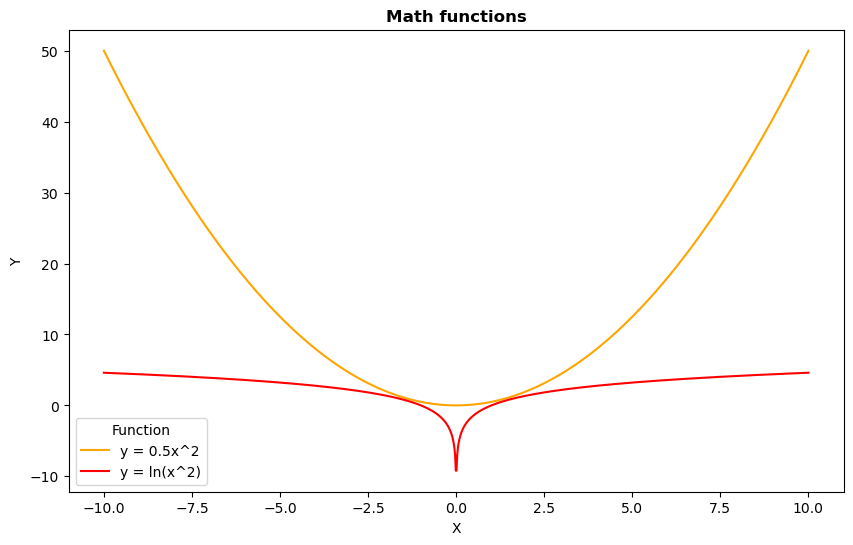

In [228]:
def fun1(x):
    return 0.5*(x**2)

def fun2(x):
    return np.log(x**2)

x_fromto = np.linspace(-10, 10, 1000) #задаём 1000 равномерно расположенных точек x от -5 до 1 
y1 = fun1(x_fromto)
y2 = fun2(x_fromto)
figure, graph = plt.subplots(figsize=(10,6))

graph.plot(x_fromto, y1, label="y = 0.5x^2", color="orange")
graph.plot(x_fromto, y2, label="y = ln(x^2)", color="red")

plt.legend(title="Function")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Math functions",fontweight='bold')

plt.grid()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

Text(0.5, 1.1, '            Target Variables Distributions')

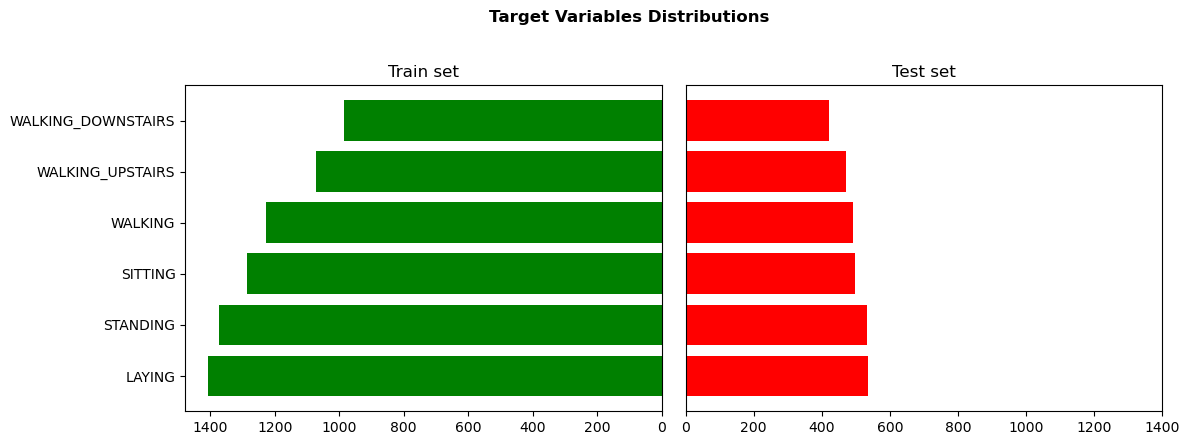

In [120]:
train_hor = pd.DataFrame(train["Activity"].value_counts())
acts = train_hor.index
cnts = train_hor.values

acts_lst = np.reshape(acts, (1,6))[0].tolist()
cnts_lst = np.reshape(cnts, (1,6))[0].tolist() #преобразовал все активности и их частоты в два одномерных списка

test_hor = pd.DataFrame(test["Activity"].value_counts())
acts2 = test_hor.index
cnts2 = test_hor.values

acts2_lst = np.reshape(acts2, (1,6))[0].tolist()
cnts2_lst = np.reshape(cnts2, (1,6))[0].tolist() #проделал ту же процедуру с датафреймом test 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.barh(acts_lst, cnts_lst, color="green")
ax1.invert_xaxis()
ax1.set_title("Train set")


ax2.barh(acts2_lst, cnts2_lst, color="red")
plt.xlim(0,1400)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_title("Test set")

plt.subplots_adjust(left=0.2, 
                    right=0.9)
plt.tight_layout()

plt.suptitle('            Target Variables Distributions', fontweight='bold', y=1.1)

Правда на таких графиках проще проверять баланс классов таргета?)

Да, можно наглядно смотреть распределение классов

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

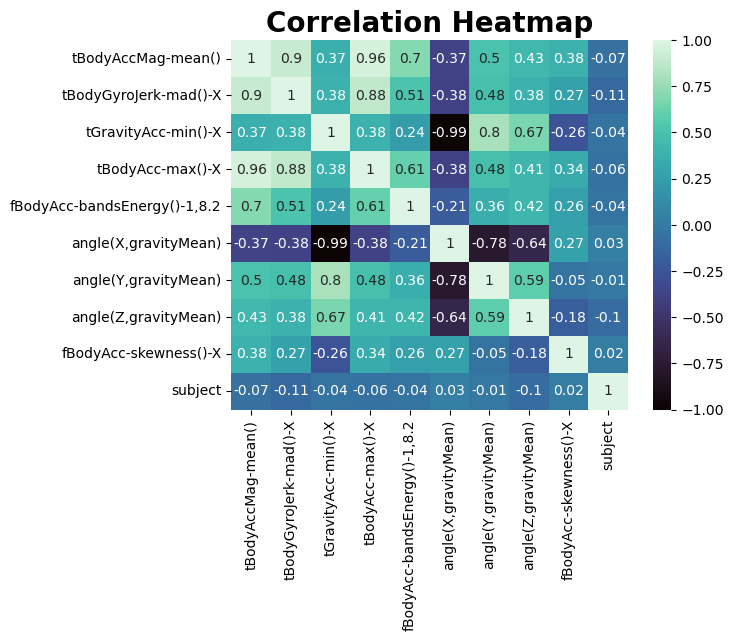

<Figure size 640x480 with 0 Axes>

In [38]:
corr_mat = train.copy().drop(columns = 'Activity').corr().round(2) #создал новую корр.матрицу без целевого признака
sns.heatmap(corr_mat, cmap="mako", vmin = -1, vmax= 1, annot=True)
plt.title("Correlation Heatmap", fontsize = 20, fontweight='bold')
plt.show()

plt.tight_layout()

Из рассмотрения нужно выкинуть признак subject, так как он по сути не несёт никакой смысловой нагрузки для модели, будучи лишь порядковым номером испытуемого для отслеживания результатов эксперимента, на основе которого был получен исходный датасет.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

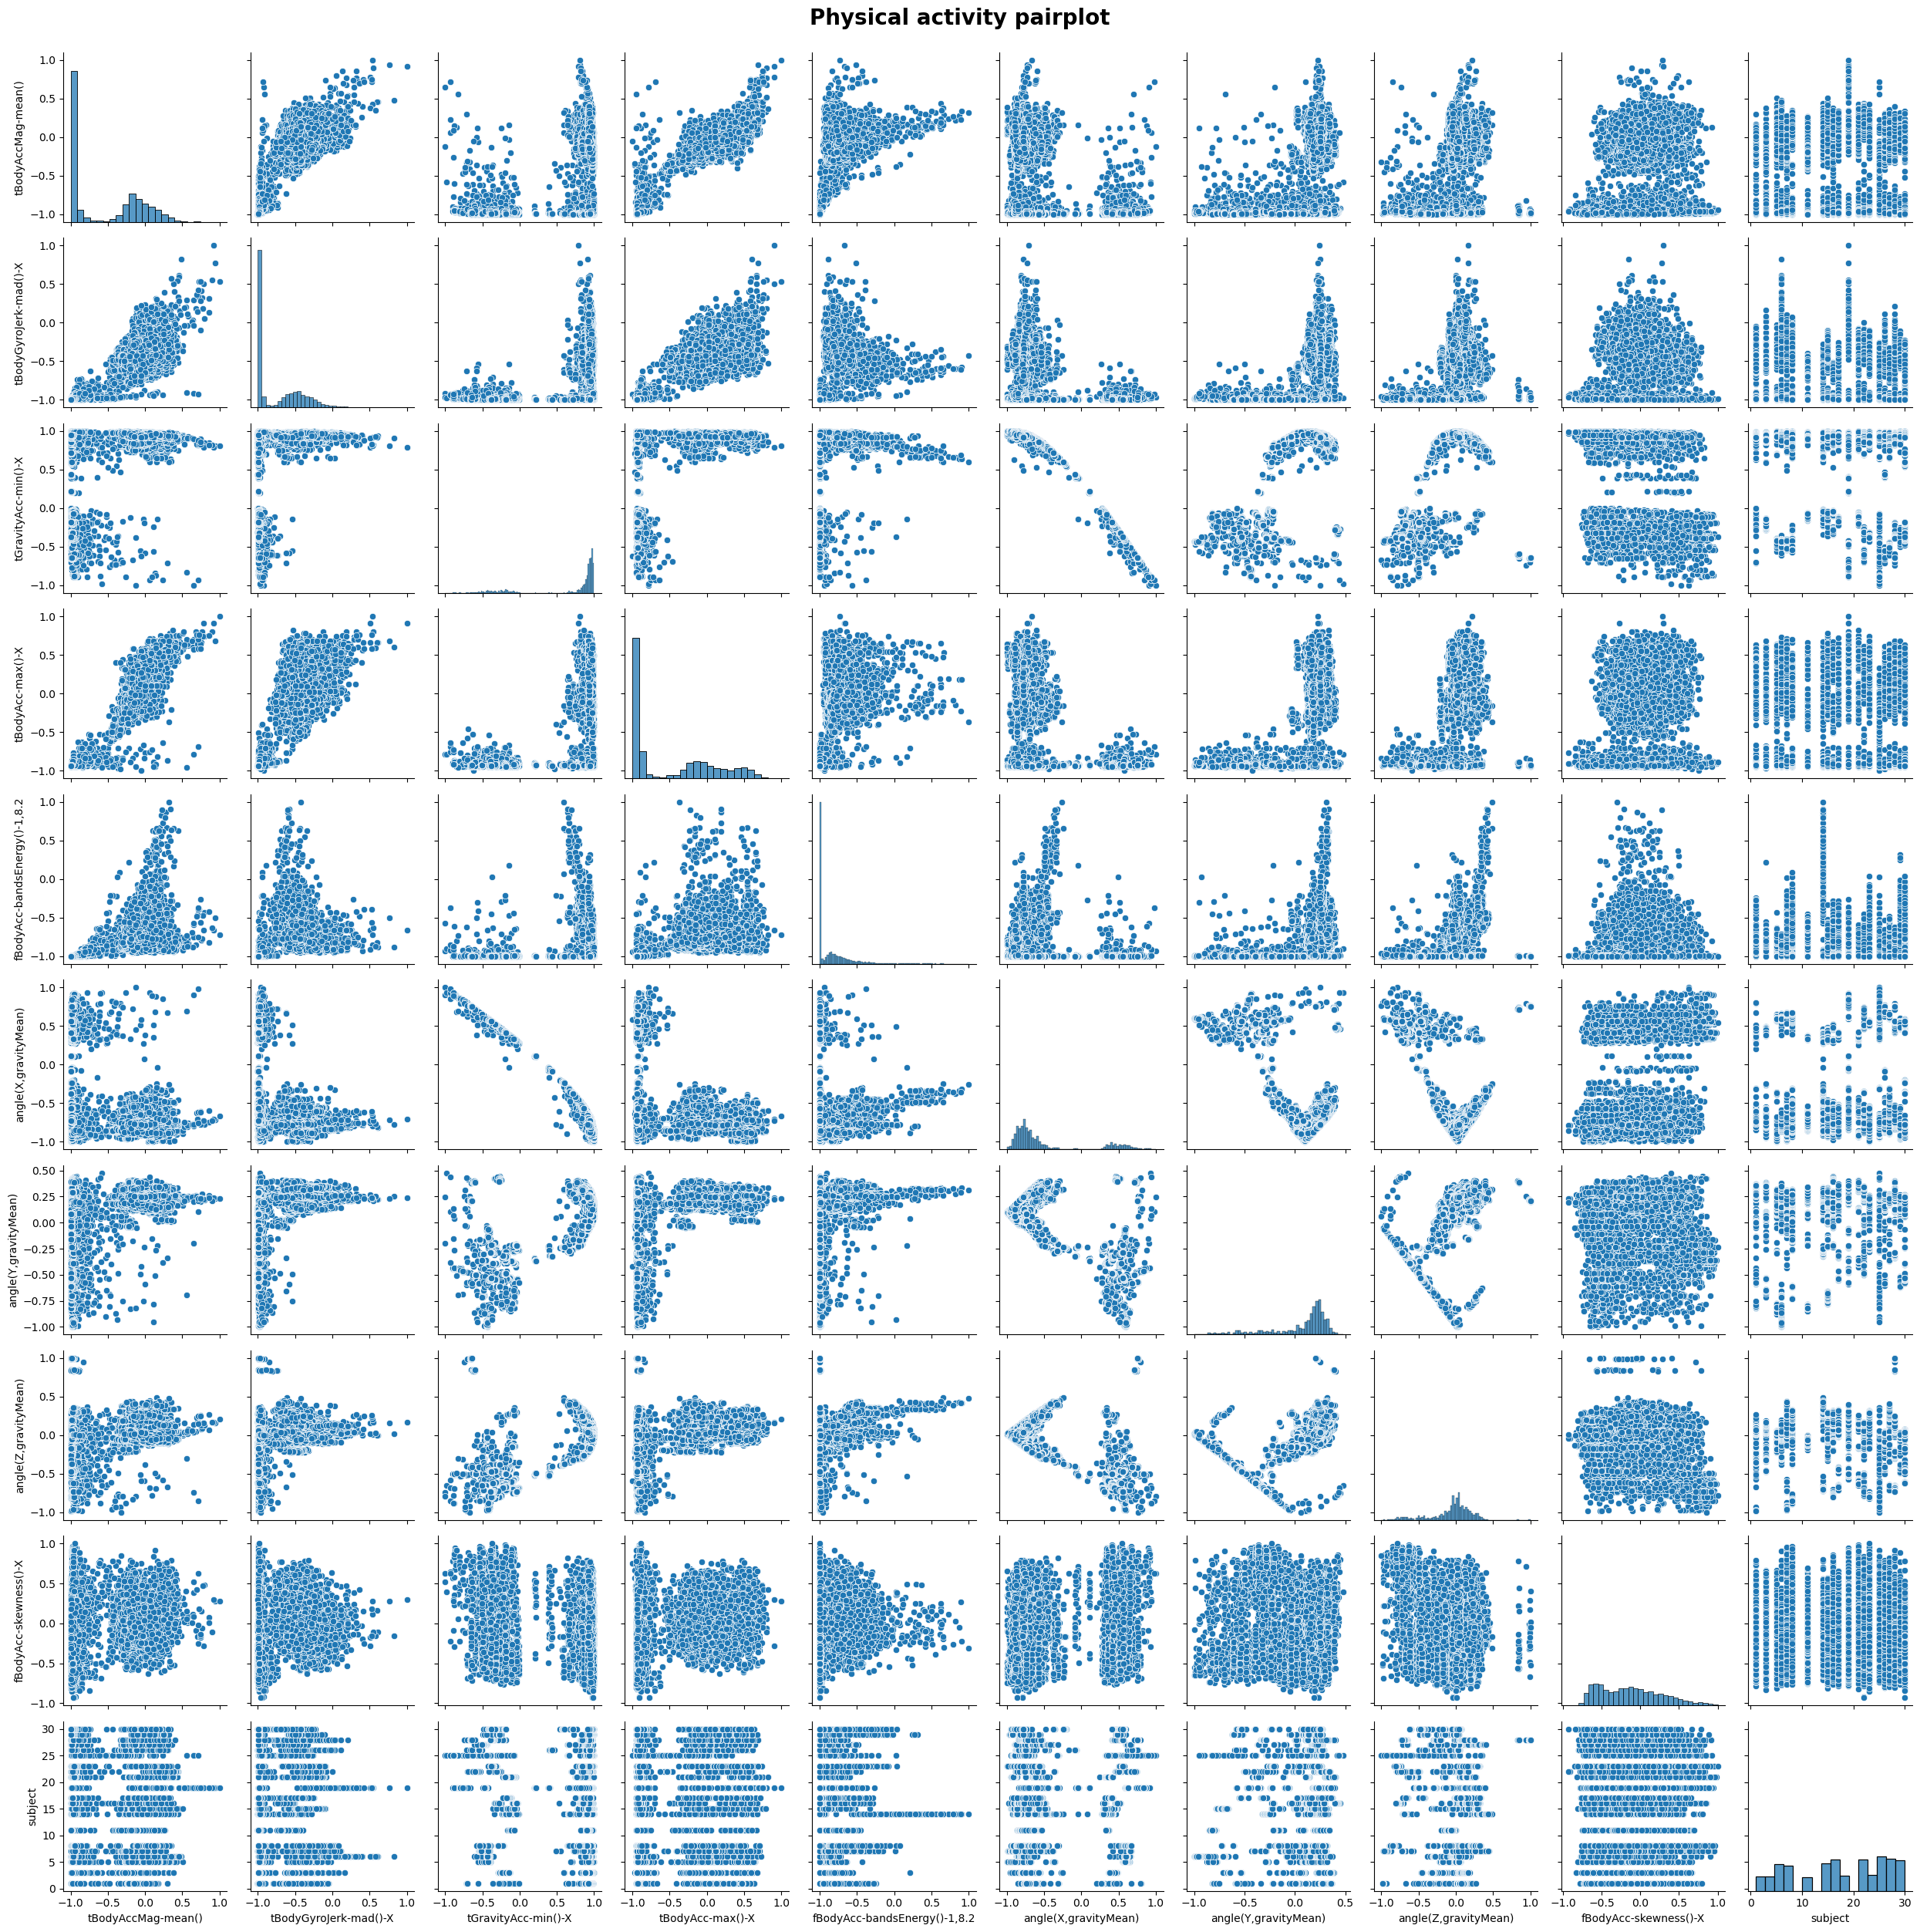

In [52]:
sns.pairplot(train.copy().drop(columns="Activity"))

plt.suptitle("Physical activity pairplot", fontsize = 20, fontweight='bold', y=1)

plt.tight_layout()

1) По pairplotу заметно, что корреляционные облака у признаков "angle(Z,gravityMean)" и "angle(Y,gravityMean)" с любым другим признаком уж слишком похожи по форме друг на друга для корреляции 0.59. Вероятно, проблема кроется в том, что мы рассматриваем линейную взаимосвязь между объектами, а она здесь неочевидна. Также поправку нужно сделать и на то, что облака всё же не являются индентичными: есть случаи, когда один сдвинут относительно другого или содержит несколько объектов, выбивающихся из визуально очевидной закономерности.

2) Схожесть всех облаков наблюдается и у признаков "tBodyAccMag-mean()", "tBodyGyroJerk-mad()-X", "tBodyAcc-max()-X". Здесь она, вероятно, может быть объяснена тем, что все три признака - это показатели рывка/ускорения тела (средняя, медиана и максимум), соответственно, если значения в выборке станут выше, то и эти описательные статистики вместе вырастут.

3) У признака "fBodyAcc-skewness()-X" тоже есть особенность. Несмотря на различие его облаков рассеивания, у всех них в нижней части (если брать "fBodyAcc-skewness()-X" за ось X) многим иксам соответствует узкий диапазон значений Y (получается неширокое продолговатое плотное скопление точек), и часто одному иксу соответствуют несколько значений Y. То есть этот признак часто очень слабо линейно связан с Y, что подтверждают и его корреляции в хитмэпе, каждая из которых ниже 0,5 по модулю.

4) По графикам на главной диагонали можно убедиться, что мои гипотезы из задания 2 о разнице разброса и асимметрии распределений верны.

А pairplot со всеми 100 графиками - очень удобная фича как раз в том плане, что можно находить закономерности в формировании облаков между признаками

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

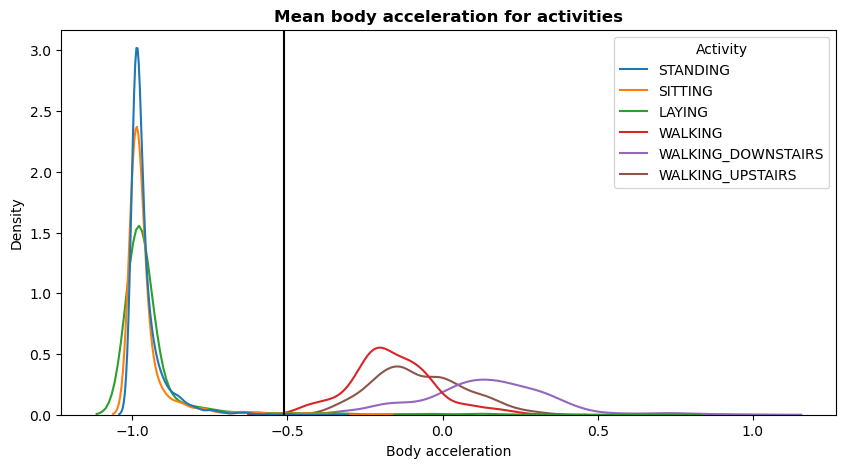

In [18]:
plt.figure(figsize=(10,5))

tsk9 =sns.kdeplot(data=train, x="tBodyAccMag-mean()", hue="Activity")
tsk9.set_xlabel("Body acceleration")
tsk9.set_title("Mean body acceleration for activities", fontweight='bold')

plt.axvline(x=-0.51, color="black", linestyle = "-")



Посмотрим, насколько точно проведённая мною линия (x = -0.51) разделяет объекты на динамические и статические:

In [20]:
train9 = train.copy() #копируем исходный датасет

def div(act):
    if act == "STANDING" or act == "SITTING" or act == "LAYING":
        return "STATIC"
    else:
        return "DYNAMIC"
        

train9["Stat/Dyn"] = train9["Activity"].apply(div)
train9

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0              -0.959434              -0.992165             0.977436   
1              -0.979289              -0.989876             0.984520   
2              -0.983703              -0.987868             0.986770   
3              -0.986542              -0.991241             0.986821   
4              -0.992827              -0.992882             0.987434   
...                  ...                    ...                  ...   
7347           -0.031719              -0.533656             0.920554   
7348           -0.065256              -0.609540             0.920554   
7349           -0.003936              -0.662918             0.933008   
7350           -0.002445              -0.645452             0.933008   
7351           -0.049090              -0.688840             0.916729   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0            -0.934724                     -0.993592             -0.841247   
1            -0.943068                     -0.998235             -0.844788   
2            -0.938692                     -0.999388             -0.848933   
3            -0.938692                     -0.999807             -0.848649   
4            -0.942469                     -0.999806             -0.847865   
...                ...                           ...                   ...   
7347          0.210795                     -0.274644             -0.791883   
7348          0.117440                     -0.310596             -0.771840   
7349          0.043999                      0.034897             -0.779133   
7350          0.101702                      0.040506             -0.785181   
7351          0.269013                     -0.106766             -0.783267   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
0                 0.179941             -0.058627               0.142051   
1                 0.180289             -0.054317              -0.692541   
2                 0.180637             -0.049118              -0.727227   
3                 0.181935             -0.047663              -0.599118   
4                 0.185151             -0.043892              -0.676997   
...                    ...                   ...                    ...   
7347              0.238604              0.049819              -0.154387   
7348              0.252676              0.050053              -0.053694   
7349              0.249145              0.040811               0.363110   
7350              0.246432              0.025339               0.382837   
7351              0.246809              0.036695              -0.243589   

      subject          Activity Stat/Dyn  
0           1          STANDING   STATIC  
1           1          STANDING   STATIC  
2           1          STANDING   STATIC  
3           1          STANDING   STATIC  
4           1          STANDING   STATIC  
...       ...               ...      ...  
7347       30  WALKING_UPSTAIRS  DYNAMIC  
7348       30  WALKING_UPSTAIRS  DYNAMIC  
7349       30  WALKING_UPSTAIRS  DYNAMIC  
7350       30  WALKING_UPSTAIRS  DYNAMIC  
7351       30  WALKING_UPSTAIRS  DYNAMIC  

[7352 rows x 12 columns]

Я создал столбец с верными значениями показателя динамичности/статичности активности.
Теперь сделаю колонку, которая будет относить объекты к этим группам на основе моей линии (tBodyAccMag-mean() = -0.51).

In [22]:
def div_predict(act):
    if act < -0.51:
        return "STATIC"
    else:
        return "DYNAMIC"
        

train9["S/D Predict"] = train9["tBodyAccMag-mean()"].apply(div_predict)
train9

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0              -0.959434              -0.992165             0.977436   
1              -0.979289              -0.989876             0.984520   
2              -0.983703              -0.987868             0.986770   
3              -0.986542              -0.991241             0.986821   
4              -0.992827              -0.992882             0.987434   
...                  ...                    ...                  ...   
7347           -0.031719              -0.533656             0.920554   
7348           -0.065256              -0.609540             0.920554   
7349           -0.003936              -0.662918             0.933008   
7350           -0.002445              -0.645452             0.933008   
7351           -0.049090              -0.688840             0.916729   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0            -0.934724                     -0.993592             -0.841247   
1            -0.943068                     -0.998235             -0.844788   
2            -0.938692                     -0.999388             -0.848933   
3            -0.938692                     -0.999807             -0.848649   
4            -0.942469                     -0.999806             -0.847865   
...                ...                           ...                   ...   
7347          0.210795                     -0.274644             -0.791883   
7348          0.117440                     -0.310596             -0.771840   
7349          0.043999                      0.034897             -0.779133   
7350          0.101702                      0.040506             -0.785181   
7351          0.269013                     -0.106766             -0.783267   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
0                 0.179941             -0.058627               0.142051   
1                 0.180289             -0.054317              -0.692541   
2                 0.180637             -0.049118              -0.727227   
3                 0.181935             -0.047663              -0.599118   
4                 0.185151             -0.043892              -0.676997   
...                    ...                   ...                    ...   
7347              0.238604              0.049819              -0.154387   
7348              0.252676              0.050053              -0.053694   
7349              0.249145              0.040811               0.363110   
7350              0.246432              0.025339               0.382837   
7351              0.246809              0.036695              -0.243589   

      subject          Activity Stat/Dyn S/D Predict  
0           1          STANDING   STATIC      STATIC  
1           1          STANDING   STATIC      STATIC  
2           1          STANDING   STATIC      STATIC  
3           1          STANDING   STATIC      STATIC  
4           1          STANDING   STATIC      STATIC  
...       ...               ...      ...         ...  
7347       30  WALKING_UPSTAIRS  DYNAMIC     DYNAMIC  
7348       30  WALKING_UPSTAIRS  DYNAMIC     DYNAMIC  
7349       30  WALKING_UPSTAIRS  DYNAMIC     DYNAMIC  
7350       30  WALKING_UPSTAIRS  DYNAMIC     DYNAMIC  
7351       30  WALKING_UPSTAIRS  DYNAMIC     DYNAMIC  

[7352 rows x 13 columns]

А теперь посчитаем долю верных ответов:

In [204]:
round(train9[train9["Stat/Dyn"] == train9["S/D Predict"]].shape[0]/train9.shape[0], 3)

0.992

Доля верных ответов составила больше 99%, что является очень хорошим показателем. Таким образом, мы можем достаточно точно сокращать число возможных активностей в два раза только на основании одного лишь признака при построении прогноза. Такой результат можно интуитивно объяснить следующим образом:

Признак tBodyAccMag-mean() показывает среднее ускорение тела. При этом, логично предположить, что ускорение будет выше, когда тело находится в движении, например, человек идёт (неважно: вверх/вних/прямо). Ходьба как активность сильно отличается по ускорению от статичного положения сидя, стоя или лёжа, так как человек в них не передвигается. Соответственно, по этому признаку мы можем разделять объекты на 2 категории, а уже внутри этих двух подгрупп с помощью других признаков определять конкретную активность.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

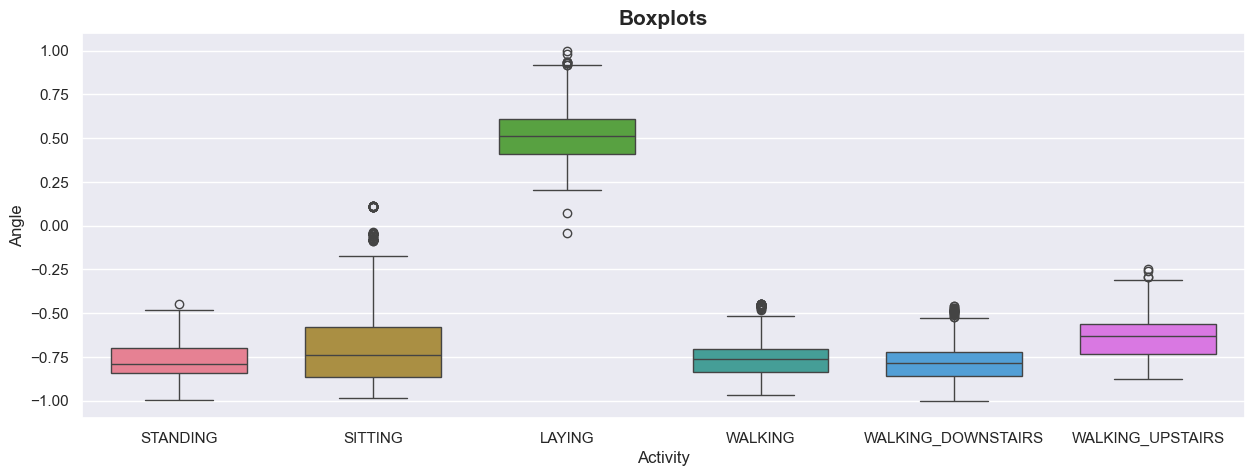

In [368]:
plt.figure(figsize=(15,5))

tsk10 = sns.boxplot(data=train, x="Activity", y= "angle(X,gravityMean)", palette="husl", width=0.7)
tsk10.set_title("Boxplots", fontsize = 15, fontweight='bold')
tsk10.set_ylabel("Angle")
plt.show()


Значительно выше других ящиков находится ящик активности "Laying" (лежачее положение), значит, для него угол между осью X и гравитационной составляющей наибольший. Это происходит, так как искомый угол, по идее, есть угол между перпендикулярным земле положением человека и его текущим положением. Когда человек стоит, идёт, спускается, этот угол минимален, ведь человек идёт почти перпендикулярно. В сидячем положении (вероятно, из-за желания опереться на спину и отклониться) и в состоянии подъёма (мы невольно нагибаем корпус вперёд, чтобы помочь ногам) угол немного увеличивается, а в лежачем состоянии, когда человек параллелен земле, угол достигает максимума. 

Также можно заметить, что у сидячего и лежачего положения есть выбросы, причем выбросы сидячего положения как будто бы даже ближе к лежачему. Вероятно, это связано с поверхностью, на которой человек сидит или лежит (допустим, положение на кресле-качалке сложно однозначно отнести к сидячему или лежачему положению). Чем ниже угол поверхности к земле, тем выше угол между человеком и гравитационной составляющей.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

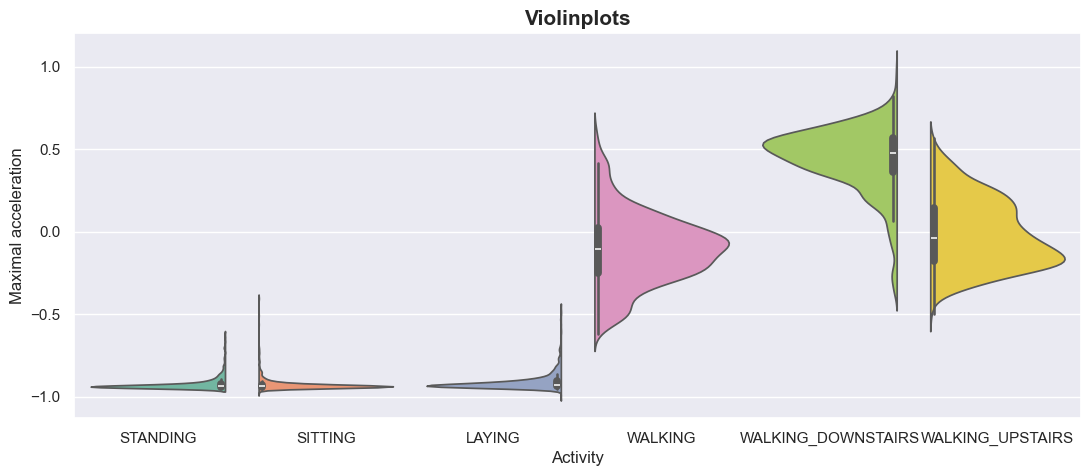

<Figure size 3000x300 with 0 Axes>

In [366]:
plt.figure(figsize=(13,5))

sns.set_theme(rc={'figure.figsize':(30,3)})
tsk11 = sns.violinplot(data=train, x="Activity", y= "tBodyAcc-max()-X", split=True, palette="Set2")

tsk11.set_ylabel("Maximal acceleration")

tsk11.set_title("Violinplots", fontsize = 15, fontweight='bold')
plt.show()

plt.tight_layout()

Ранее я уже писал о том, что максимальное ускорение присуще движению вниз по лестнице, скрипичная диаграмма это доказывает: на ней салатовый фрагмент (спуск) принимает более высокие значения, чем остальные фрагменты. Такая ситуация возникает из-за того, что при спуске люди тянут ногу вниз, и быстро ставят на более нижнюю ступень, то есть им при движении помогает гравитация, и ускорение выше, чем при других активностях.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

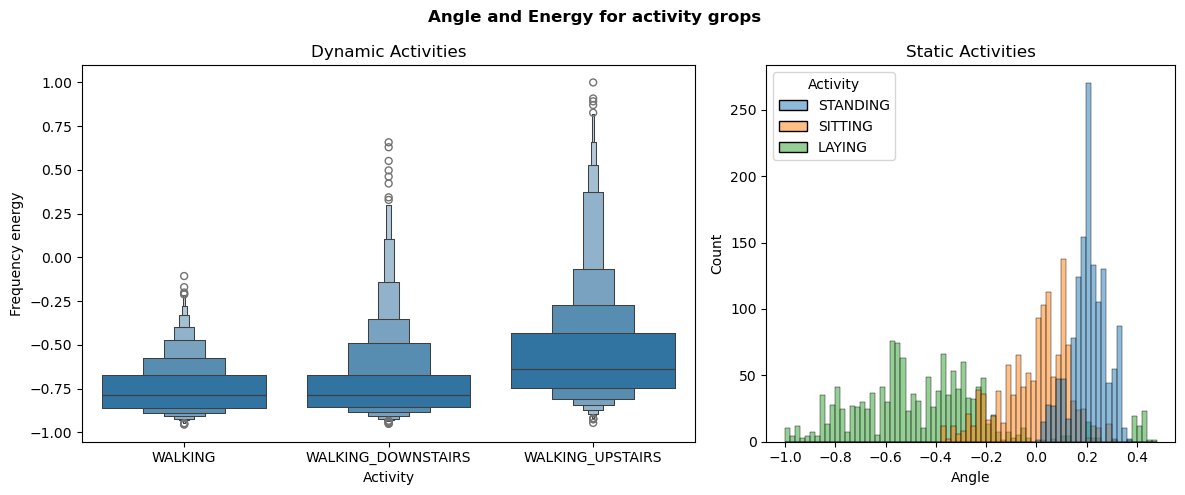

In [24]:
import matplotlib.gridspec as gridspec

train12_dy = train9[train9["Stat/Dyn"] == "DYNAMIC"]

train12_st = train9[train9["Stat/Dyn"] == "STATIC"]


fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1.5, 1]}, figsize = (12,5))

ax2.set_title("Static Activities")
ax1.set_title("Dynamic Activities")

sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.boxenplot(data=train12_dy, x="Activity", y= "fBodyAcc-bandsEnergy()-1,8.2", ax=ax1)

ax1.set_ylabel("Frequency energy")
ax2.set_xlabel("Angle")
sns.histplot(data=train12_st, x ="angle(Y,gravityMean)", ax=ax2, hue="Activity", binwidth=0.02)

plt.suptitle("Angle and Energy for activity grops", fontweight='bold')
fig.tight_layout()

plt.show()

По первому графику заметно, что значение энергии ускорения тела выше 0 достигается только во время ходьбы вверх или вниз, и соотвутствующее ограничение позволит отсечь ходьбу по прямой. Значения выше 0.75 достигаются только при подъёме, таким образом, мы сможем точно определить активность, если признак превысит данное значение.

По второму графику видно, что угол ниже - 0.4 наблюдается только в положении лёжа. Значения выше 0.4 тоже преимущественно соответствуют этому положению. Экстремально высокая частота для одного интервала наблюдается наблюдается в положении стоя для углов, близких к 0.2. Более того, именно у положения стоя визуально разброс значений кажется наименьшим среди статичных активностей (встречаются значения от 0 до 0.4 с редкими примерами с большим значением, тогда как в положении сидя угол может быть равен от -0.4 до примерно 0.31, а в положении лёжа с разной вероятностью значения угла попадают почти в каждый интервал, хоть и с разной частотой).

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

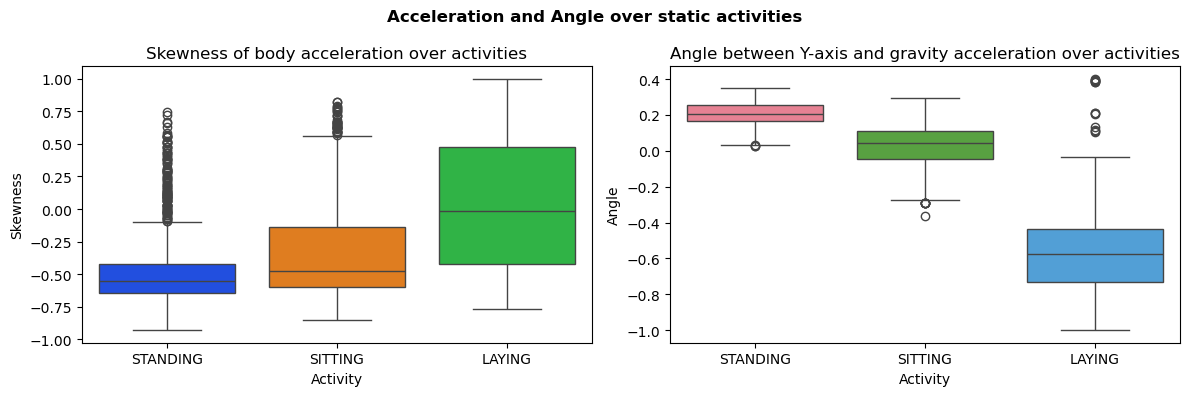

In [26]:
train13 = train12_st 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

sns.boxplot(data=train13, x="Activity", y= "fBodyAcc-skewness()-X", ax=ax1, palette="bright")
ax1.set_title("Skewness of body acceleration over activities")

ax1.set_ylabel("Skewness")
sns.boxplot(data=train13[train13["fBodyAcc-skewness()-X"] < -0.376], x="Activity", y= "angle(Y,gravityMean)", ax=ax2, palette="husl")
ax2.set_title("Angle between Y-axis and gravity acceleration over activities")
ax2.set_ylabel("Angle")
plt.suptitle("Acceleration and Angle over static activities", fontweight='bold')

fig.tight_layout()

Чётко разделить категории  по первому графику проблематично, так как значения асимметричности частоты ускорения тела по оси Х со всего промежутка от -1 до 1 могут принадлежать любой из трёх статичных активностей, просто для никоторых категорий такие значения будут считаться выбросами, но судя по количеству точек за пределами границ, рассчитанных по методу 1.5*IQR у категорий STANDING и SITTING, выбросов всё-таки немало. 

По второму ящику с усами уже можно утверждать, что значения угла между осью Y и усредненной гравитационной составляющей ускорения ниже -0.4 в тренировочной выборке принадлежат только положению лёжа (голубой график), поэтому таким ограничением можно с высокой выероятностью выделить именно эту категорию. При этом, если значение угла будет отрицательным, следуя результатам тренировочной выборки, можно будет точно отбросить положение стоя (розовый график) как возможную активность, ведь все его значения сконцентрированы в положительной части шкалы.

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

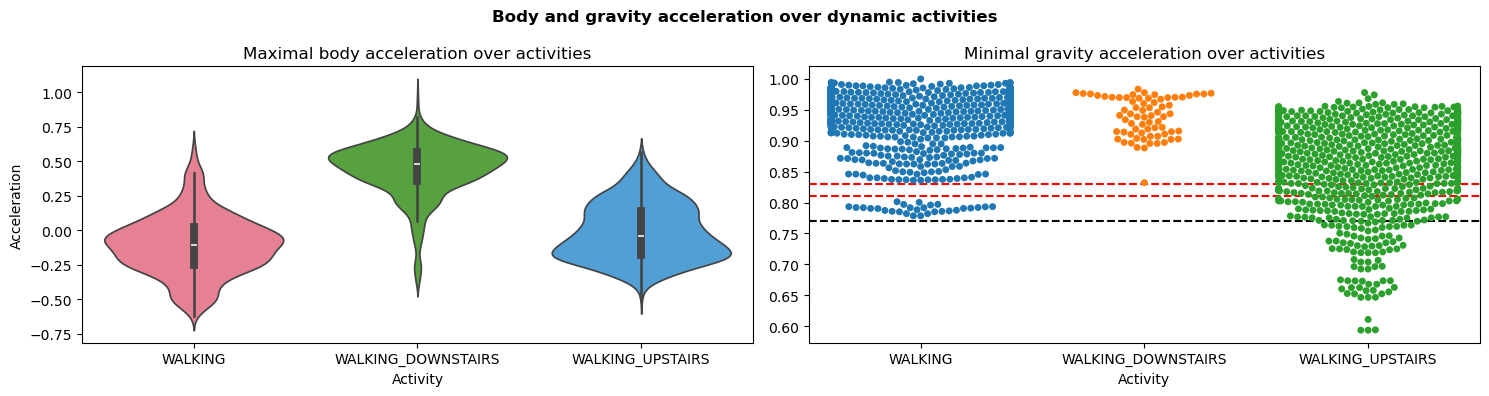

In [36]:
train14 = train12_dy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))

sns.violinplot(data=train14, x="Activity", y= "tBodyAcc-max()-X", palette="husl", ax=ax1)
train14_2 = train14[train14["tBodyAcc-max()-X"] < 0.157]
sns.swarmplot(data=train14_2, x="Activity", y= "tGravityAcc-min()-X", palette="tab10", ax=ax2)

ax1.set_ylabel("Acceleration")
ax2.set_ylabel("")

ax1.set_title("Maximal body acceleration over activities")
ax2.set_title("Minimal gravity acceleration over activities")

plt.suptitle("Body and gravity acceleration over dynamic activities", fontweight='bold')

ax2.axhline(0.77, color = "black", linestyle="--")
ax2.axhline(0.83, color = "red", linestyle="--")
ax2.axhline(0.81, color = "red", linestyle="--")

fig.tight_layout()

Я провёл чёрную линию, отсекающую низкие значения ускорения при подъёме вверх от других точек, на уровне 0.77. Также красными линями наметил коридор, в который входят только зелёные точки (и на границе возможно ещё 1 жёлтая). Он расположенен от значения ускорения в 0.81 до значения в 0.83. 

Комментарий после 16 задания: эти линии хорошо себя показали и помогли достичь высокого значения accuracy.

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [70]:
pip install plotly

In [401]:
%%time


from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 5min 12s
Wall time: 1min 18s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

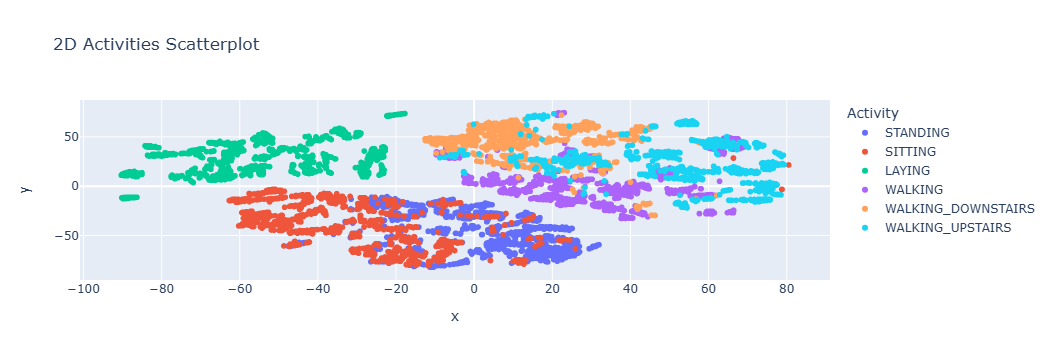

In [404]:
import plotly.express as px

px.scatter(df_2_comp, x="x", y="y", color = "Activity", title="2D Activities Scatterplot")

В глаза бросается облако из зелёных точек, т.е. точек, которым соответствует активность 'лежать'. Мне кажется, провести именно что прямую, которая чётко бы отделила все зелёные не получится, в связи с тем, что они занимают значительную площадь, однако прямую, которая бы наверняка отделяла большинство зеленых точек построить можно. Её уравнение бы примерно выглядела как y = 1,25x + 75, т.е она бы прошла через точки (-100;-50) и (-60;0). Но повторюсь, что хоть и меньшинство, но всё же немалое количество точек останется по правую сторону прямой.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

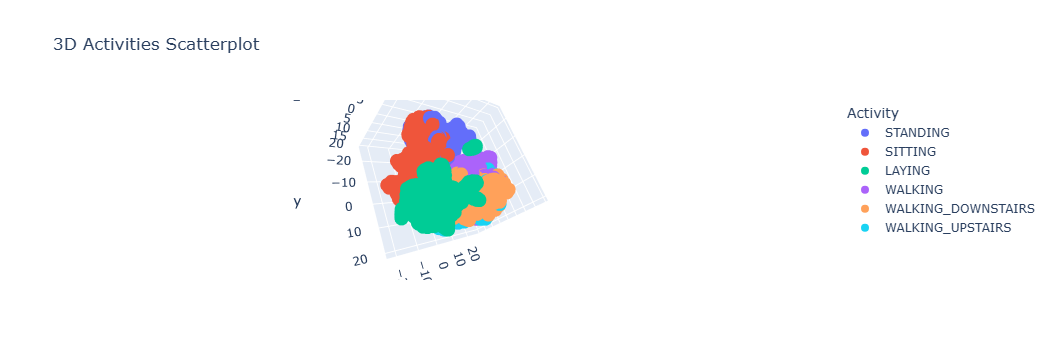

In [133]:
px.scatter_3d(df_3_comp, x="x", y="y", z="z", color = "Activity", title="3D Activities Scatterplot")


Да, определённая структура прослеживается. 

1) Все динамические активности слились в одно трёхмерное облако, которое изнутри ещё смотрится разделимым, но внутри него все цвета перемешались.

2) Облака активностей "стоять" (синее) и "сидеть" (красное) тоже слились.

3) А вот облако, соответствующее активности "лежать" существует отдельно от других (как и в случае с двумерныи пространством). Однако несколько точек от него отделились и существуют в самом низу и посередине скеттерплота.

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [13]:
def predict(df: pd.DataFrame):
    vector = [0] * df.shape[0]                                  #вектор, который будет заполняться ответами
    for i in range(0, df.shape[0]):
        if df.iloc[i]["tBodyAccMag-mean()"] < -0.51:
            if df.iloc[i]["angle(X,gravityMean)"] >= 0:
                vector[i] = "LAYING"
            elif df.iloc[i]["angle(X,gravityMean)"] > -0.417:
                vector[i] = "SITTING"
            else:
                if df.iloc[i]["fBodyAcc-skewness()-X"] < -0.376 and df.iloc[i]["angle(Y,gravityMean)"] < 0:
                        vector[i] = "SITTING"
                else:
                    if df.iloc[i]["angle(Y,gravityMean)"] <= 0.125:
                        vector[i] = "SITTING"
                    else:
                        if df.iloc[i]["angle(X,gravityMean)"] > -0.417:
                                vector[i] = "SITTING"
                        else:
                                vector[i] = "STANDING"
                                 
                                
        else:
              if df.iloc[i]["angle(X,gravityMean)"] >= -0.5:
                  vector[i] = "WALKING_UPSTAIRS"
              else:
                  if (df.iloc[i]["tBodyAcc-max()-X"] < 0.157 and df.iloc[i]["tGravityAcc-min()-X"] <= 0.77) or (df.iloc[i]["tBodyAcc-max()-X"] < 0.157 and df.iloc[i]["tGravityAcc-min()-X"] <= 0.83 and df.iloc[i]["tGravityAcc-min()-X"] >= 0.81):
                      vector[i] = "WALKING_UPSTAIRS"
                  else:
                        if df.iloc[i]["tBodyAcc-max()-X"] < -0.25:
                            vector[i] = "WALKING"
                        elif df.iloc[i]["tBodyAcc-max()-X"] >= 0.5:
                            vector[i] = "WALKING_DOWNSTAIRS"
                        else:
                            if df.iloc[i]["tBodyAcc-max()-X"] > -0.5 and df.iloc[i]["tBodyAcc-max()-X"] <= -0.07:
                                    vector[i] = "WALKING_UPSTAIRS"
                            elif df.iloc[i]["tBodyAcc-max()-X"] > -0.07 and df.iloc[i]["tBodyAcc-max()-X"] < 0:
                                vector[i] = "WALKING"
                                
                            else:
                                vector[i] = "WALKING_DOWNSTAIRS"
                            
                      
                
            
                                                                     
    
    return vector


def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.7536724700761698
Accuracy on test set => 0.7550050899219545


Распишу, как я строил модель. 


1. Сначала я создал список, заполненный нулями, длиною с датафрейм (то есть, с количество его строк), потому что функция accuracy score при присваивании значения y_true, y_pred преобразовывает вектор любого формата в массив numpy.
2. Сначала я разделил все активности на динамические и статические, потому что так мы можем перейти к исследованию 3х объектов из каждой подгруппы
и избежать обращения сразу ко всем активностям. Тем более, в 9 задании была найдена очень точная линия, которая хорошо легла в основу модели.
3. Далее я перешёл к работе со статическими активностями, и методом пристального взгляда заметил, что через установку положительного угла (боксплот из 10 задания) можно с высокой точностью выделить активность "лежать". А далее методом проб и ошибок смог удачно расставить ограничения так, что при проходе только по статическим активностям доля верных ответов была около 90%.

4. С динамическими активностями ситуация обстояла сложнее, ведь сложно было придумать признак с которого стоило начать: по графикам можно было отделить только некоторые области активностей, поэтому accuracy всегда получалась на порядок ниже, чем в лагере статических. Но я опять же методом пристального взгляда подбирал ограничения для классов, а затем, уже после теста модели, смотрел насколько их уточнение повлияет на качество модели.

__Место для мема и/или фидбэка__

> После 16 задания уже как-то не до мемов...